In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('IMDb Movies India.csv',encoding="latin-1")

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
(df.isnull().sum()/15508)*100

Name         0.000000
Year         3.404694
Duration    53.320867
Genre       12.103430
Rating      48.942481
Votes       48.936033
Director     3.385349
Actor 1     10.426876
Actor 2     15.372711
Actor 3     20.273407
dtype: float64

In [6]:
# we need to predict movie rating by using variables like 'genre','director','actor 1','actor 2','actor 3'

In [7]:
df.drop(columns=['Name','Year','Duration','Votes'],axis=1,inplace=True)

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.describe(include='object')

,Genre,Director,Actor 1,Actor 2,Actor 3
count,7558,7558,7558,7558,7558
unique,416,2956,2415,2783,3031
top,Drama,Mahesh Bhatt,Jeetendra,Rekha,Pran
freq,1137,45,140,79,74


In [10]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [11]:
df.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# UNIVARIATE ANALYSIS

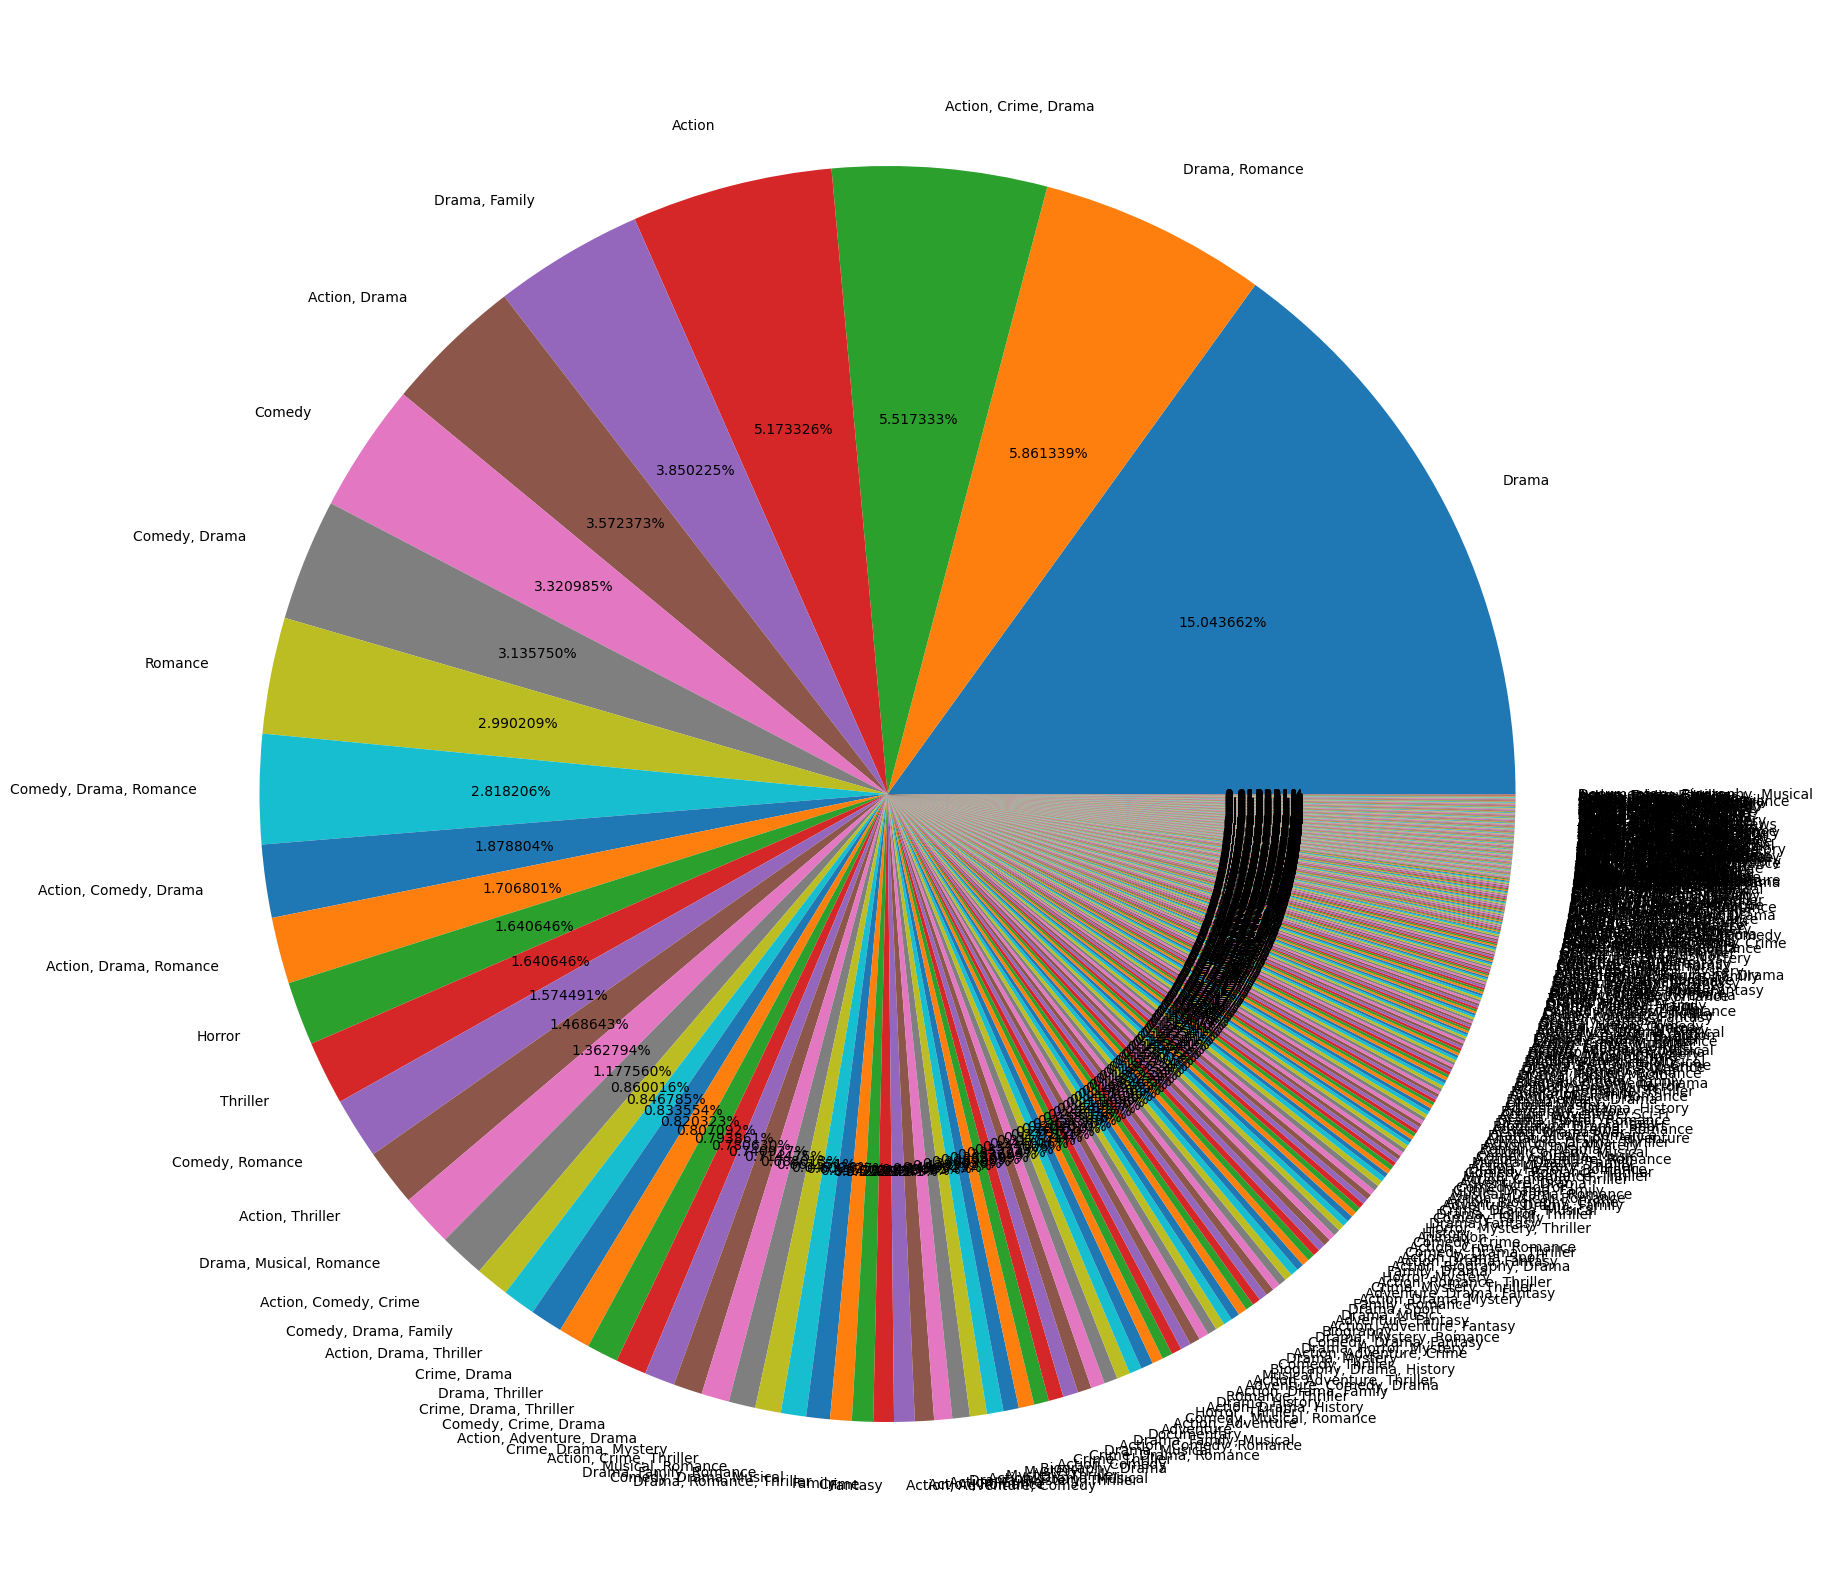

In [12]:
label = df["Genre"].value_counts().index
sizes = df["Genre"].value_counts()
plt.figure(figsize = (20,16))
plt.pie(sizes, labels= label, startangle = 0 , shadow = False , autopct='%2f%%')
plt.tight_layout()
plt.show()

In [13]:
# 'Drama' is the most repeated genre 

# BIVARIATE ANALYSIS

In [14]:
table=pd.crosstab(index=df['Actor 1'],columns=df['Genre'])

In [15]:
table

Genre,Action,"Action, Adventure","Action, Adventure, Biography","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror",...,"Romance, Thriller, Mystery",Sci-Fi,"Sci-Fi, Thriller",Sport,Thriller,"Thriller, Action","Thriller, Musical, Mystery","Thriller, Mystery","Thriller, Mystery, Family",War
Actor 1,,,,,,,,,,,,,,,,,,,,,
A. Muthu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Nairang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K. Hangal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K. Misra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.S. Ravindra Babu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zarina Wahab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zayed Khan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zeenat Aman,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TARGET ENCODING

In [16]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_encoded'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [17]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_encoded,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.345910,7.000000,6.850000,7.000000,7.000000
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.700000,4.400000,5.420000,4.400000,4.450000
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889,5.786667,5.766667
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.500000,5.300000,6.050000,6.500000
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.463636,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...
15501,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.616067,5.571429,5.742537,6.075000,4.895652
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.616067,5.885714,6.328571,5.800000,5.850000
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.045524,4.075000,6.025532,3.700000,4.600000
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.460741,5.225000,5.481707,4.645455,5.617143


In [18]:
df.drop(['Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)

In [19]:
df.isnull().sum()

Rating              0
Genre_encoded       0
Director_encoded    0
Actor1_encoded      0
Actor2_encoded      0
Actor3_encoded      0
dtype: int64

# MODEL BUILDING

In [20]:
x=df.drop(['Rating'],axis=1)
y=df['Rating']

In [21]:
import statsmodels.api as sma
from sklearn.model_selection import train_test_split

In [22]:
x_c=sma.add_constant(x)

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.2,random_state=42)

In [24]:
model_stats=sma.OLS(ytrain,xtrain).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3754.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:48:51   Log-Likelihood:                -6210.5
No. Observations:                6046   AIC:                         1.243e+04
Df Residuals:                    6040   BIC:                         1.247e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2722      0.093    -24.502      0.000      -2.454      -2.090
Genre_encoded        0.1284      0.017      7.491      0.000       0.095       0.162
Director_encoded     0.4197      0.013     32.195      0.000       0.394       0.445
Actor1_encoded       0.2472      0.013     18.352      0.000       0.221       0.274
Actor2_encoded       0.2625      0.014     19.400      0.000       0.236       0.289
Actor3_encoded       0.3332      0.013     25.350      0.000       0.307       0.359
==============================================================================
Omnibus:                      244.317   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.259
Skew:                          -0.104   Prob(JB):                    5.96e-160
Kurtosis:                       4.693   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

In [26]:
X=df.drop(['Rating'],axis=1)
y=df['Rating']

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [28]:
model_lr=LinearRegression().fit(xtrain,ytrain)
pred_train=model_lr.predict(xtrain)
pred_test=model_lr.predict(xtest)

In [29]:
model_lr.score(xtrain,ytrain),model_lr.score(xtest,ytest)

(0.7549595611811927, 0.7600702739113309)

In [30]:
mean_squared_error(ytest,model_lr.predict(xtest),squared=False),mean_squared_error(ytrain,model_lr.predict(xtrain),squared=False)

(0.670378635809267, 0.6771726391445233)

In [31]:
lasso=Lasso()
ridge=Ridge()
enet=ElasticNet()

In [32]:
ridge_1a=Ridge(alpha=1,max_iter=500)
ridge_1a.fit(xtrain,ytrain)

Ridge(alpha=1, max_iter=500)

In [33]:
mean_squared_error(squared=False,y_true=ytrain,y_pred=ridge_1a.predict(xtrain)),mean_squared_error(squared=False,y_true=ytest,y_pred=ridge_1a.predict(xtest))

(0.6771726426234352, 0.6703768065412997)

In [34]:
ridge_2a=Ridge(alpha=2,max_iter=500)
ridge_2a.fit(xtrain,ytrain)

Ridge(alpha=2, max_iter=500)

In [35]:
perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [36]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'Alpha'          : alpha,
                                    'L1_Ratio'       : l1_ratio,
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [37]:
update_performance(name='linear regression',model=model_lr)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.75496,0.76007,0.677173,0.670379,9.565074


In [38]:
update_performance(name='ridge', model=ridge_1a, alpha=1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.75496,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.75496,0.760072,0.677173,0.670377,9.565011


In [39]:
update_performance(name='ridge', model=ridge_2a, alpha=2)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.75496,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.75496,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.75496,0.760073,0.677173,0.670375,9.564949


In [40]:
lasso=Lasso(alpha=0.01,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.01, max_iter=500)

In [41]:
update_performance(name='lasso', model=lasso, alpha=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163


In [42]:
lasso=Lasso(alpha=0.1,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.1, max_iter=500)

In [43]:
update_performance(name='lasso', model=lasso, alpha=0.1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756


In [44]:
lasso=Lasso(alpha=0.005,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.005, max_iter=500)

In [45]:
update_performance(name='lasso', model=lasso, alpha=0.005)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691


In [46]:
lasso=Lasso(alpha=0.001,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.001, max_iter=500)

In [47]:
update_performance(name='lasso', model=lasso, alpha=0.001)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454


In [48]:
enet=ElasticNet(alpha=0.1,l1_ratio=0.01,max_iter=500)
enet.fit(xtrain,ytrain)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

In [49]:
update_performance(name='enet', model=enet, alpha=0.1,l1_ratio=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633


In [50]:
lasso=Lasso()
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=5)

In [51]:
grid_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [52]:
update_performance(name='grid_lasso', model=grid_lasso, alpha=0.05)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454


In [53]:
enet=ElasticNet()
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })

grid_enet=GridSearchCV(estimator=enet,
                       param_grid=params,
                       scoring='r2',
                       cv=5)

In [54]:
grid_enet.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   12, 15, 20],
                         'l1_ratio': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.7, 0.8,
                                      0.9, 0.25]},
             scoring='r2')

In [55]:
update_performance(name='grid_enet', model=grid_enet, alpha=0.05)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [56]:
grid_enet.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.001)

In [57]:
from sklearn.linear_model import SGDRegressor

In [58]:


sgd = SGDRegressor()

sgd.fit(xtrain,ytrain)


update_performance(name = 'Stochastic GD L2', model =sgd, alpha='0.0001-lr',l1_ratio=0.15)

# print the dataframe
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [59]:
sgd.fit(xtrain,ytrain)


update_performance(name = 'Stochastic GD L2', model =sgd, alpha='0.0001-lr',l1_ratio=0.15)

# print the dataframe
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt=DecisionTreeRegressor(random_state=10)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=10)

In [62]:
update_performance(name = 'decision_tree', model =dt)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestRegressor(random_state=10)

In [64]:
update_performance(name = 'random_forest', model =rf)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knn=KNeighborsRegressor()

In [67]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [68]:
update_performance(name ='knn', model =knn)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [69]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(dt,random_state=10)
ada.fit(xtrain,ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=10),
                  random_state=10)

In [70]:
update_performance(name ='ada', model =ada)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gb=GradientBoostingRegressor(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=50, random_state=10)

In [73]:
update_performance(name ='gb', model =gb)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [74]:
hyperparameter_grid = {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,2,3,4,5,6,7,8,9,12,15],
    'learning_rate': [0.02,0.03,0.04,0.05, 0.1, 0.20],
    
    }

In [75]:
gb_tun1=GradientBoostingRegressor(random_state=10)
gb_tun1_cv=GridSearchCV(estimator=gb_tun1,param_grid=hyperparameter_grid,cv=5)
gb_tun1_cv.fit(xtrain,ytrain)
gb_tun1_cv.best_params_

{'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 200}

In [80]:
gb=GradientBoostingRegressor(n_estimators=200,learning_rate=0.04,random_state=10,max_depth=5)
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.04, max_depth=5, n_estimators=200,
                          random_state=10)

In [81]:
update_performance(name ='gb_tuned', model =gb_tun)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.754960,0.760070,0.677173,0.670379,9.565074
1,ridge,1,-,0.754960,0.760072,0.677173,0.670377,9.565011
2,ridge,2,-,0.754960,0.760073,0.677173,0.670375,9.564949
3,lasso,0.01,-,0.754785,0.759580,0.677413,0.671063,9.562163
4,lasso,0.1,-,0.746343,0.749701,0.688976,0.684712,9.771756
5,lasso,0.005,-,0.754916,0.759868,0.677233,0.670662,9.562691
6,lasso,0.001,-,0.754958,0.760038,0.677175,0.670424,9.564454
7,enet,0.1,0.01,0.754152,0.759820,0.678288,0.670729,9.553633
8,grid_lasso,0.05,-,0.754958,0.760038,0.677175,0.670424,9.564454
9,grid_enet,0.05,-,0.754178,0.759870,0.678251,0.670658,9.553223


In [78]:
#gradient boosting is the best model with high R square value and low RMSE and MAPE score
#eventhough tried to tune the model, but no improvement in score.

In [79]:
#########################################################################################